In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import plotly.express as px

### Connect to bd + check connection

In [2]:
conn = psycopg2.connect(dbname='astro', user='postgres', password='1', host='localhost')
cursor = conn.cursor()

In [3]:
cursor.execute('SELECT * FROM planets LIMIT 5')

In [4]:
records = cursor.fetchall()

In [5]:
records

[(1,
  datetime.date(1930, 1, 1),
  Decimal('2425978.00'),
  Decimal('280.3677933000'),
  Decimal('296.7942189000'),
  Decimal('298.7674954000'),
  Decimal('271.6915708000'),
  Decimal('272.2936215000'),
  Decimal('67.8343911200'),
  Decimal('273.7710955000'),
  Decimal('7.5536817940'),
  Decimal('153.3954293000'),
  Decimal('108.7134364000')),
 (2,
  datetime.date(1930, 1, 2),
  Decimal('2425979.00'),
  Decimal('281.3874413000'),
  Decimal('308.6519293000'),
  Decimal('300.0852391000'),
  Decimal('272.9496051000'),
  Decimal('273.0465415000'),
  Decimal('67.7401988900'),
  Decimal('273.8888554000'),
  Decimal('7.5672789640'),
  Decimal('153.3809706000'),
  Decimal('108.6923467000')),
 (3,
  datetime.date(1930, 1, 3),
  Decimal('2425980.00'),
  Decimal('282.4070472000'),
  Decimal('320.5262015000'),
  Decimal('301.3468626000'),
  Decimal('274.2075939000'),
  Decimal('273.8001505000'),
  Decimal('67.6487029200'),
  Decimal('274.0064412000'),
  Decimal('7.5817163480'),
  Decimal('153.366

In [6]:
cursor.close()

### Get data and transfer it into a dataframe

In [7]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM planets')
planets = pd.DataFrame(cursor.fetchall())
cursor.close()

In [8]:
conn.close()

In [9]:
planets

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1930-01-01,2425978.00,280.3677933000,296.7942189000,298.7674954000,271.6915708000,272.2936215000,67.8343911200,273.7710955000,7.5536817940,153.3954293000,108.7134364000
1,2,1930-01-02,2425979.00,281.3874413000,308.6519293000,300.0852391000,272.9496051000,273.0465415000,67.7401988900,273.8888554000,7.5672789640,153.3809706000,108.6923467000
2,3,1930-01-03,2425980.00,282.4070472000,320.5262015000,301.3468626000,274.2075939000,273.8001505000,67.6487029200,274.0064412000,7.5817163480,153.3660172000,108.6711869000
3,4,1930-01-04,2425981.00,283.4265880000,332.4547543000,302.5426243000,275.4655256000,274.5544371000,67.5599633900,274.1238318000,7.5969895660,153.3505751000,108.6499648000
4,5,1930-01-05,2425982.00,284.4460433000,344.4864589000,303.6615961000,276.7233916000,275.3093919000,67.4740389200,274.2410080000,7.6130956790,153.3346527000,108.6286902000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29945,29946,2011-12-27,2455923.00,275.3715415000,310.5454958000,254.0695726000,308.2932493000,168.9435569000,30.3688602900,207.9916866000,0.7688148350,328.7699525000,277.1626388000
29946,29947,2011-12-28,2455924.00,276.3908431000,323.6959757000,255.3006572000,309.5231401000,169.2174871000,30.3761223200,208.0603641000,0.7839741280,328.7956385000,277.1983974000
29947,29948,2011-12-29,2455925.00,277.4101434000,336.4775309000,256.5630803000,310.7524046000,169.4835662000,30.3868717400,208.1276050000,0.7999640960,328.8217452000,277.2341478000
29948,29949,2011-12-30,2455926.00,278.4294284000,348.9275871000,257.8532896000,311.9810157000,169.7416493000,30.4011027800,208.1933991000,0.8167846770,328.8482699000,277.2698882000


In [10]:
planets.columns = ['id', 'date_g', 'date_y', 'sun', 'moon', 'mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uran', 'neptun', 'pluton']

In [11]:
planets

,id,date_g,date_y,sun,moon,mercury,venus,mars,jupiter,saturn,uran,neptun,pluton
0,1,1930-01-01,2425978.00,280.3677933000,296.7942189000,298.7674954000,271.6915708000,272.2936215000,67.8343911200,273.7710955000,7.5536817940,153.3954293000,108.7134364000
1,2,1930-01-02,2425979.00,281.3874413000,308.6519293000,300.0852391000,272.9496051000,273.0465415000,67.7401988900,273.8888554000,7.5672789640,153.3809706000,108.6923467000
2,3,1930-01-03,2425980.00,282.4070472000,320.5262015000,301.3468626000,274.2075939000,273.8001505000,67.6487029200,274.0064412000,7.5817163480,153.3660172000,108.6711869000
3,4,1930-01-04,2425981.00,283.4265880000,332.4547543000,302.5426243000,275.4655256000,274.5544371000,67.5599633900,274.1238318000,7.5969895660,153.3505751000,108.6499648000
4,5,1930-01-05,2425982.00,284.4460433000,344.4864589000,303.6615961000,276.7233916000,275.3093919000,67.4740389200,274.2410080000,7.6130956790,153.3346527000,108.6286902000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29945,29946,2011-12-27,2455923.00,275.3715415000,310.5454958000,254.0695726000,308.2932493000,168.9435569000,30.3688602900,207.9916866000,0.7688148350,328.7699525000,277.1626388000
29946,29947,2011-12-28,2455924.00,276.3908431000,323.6959757000,255.3006572000,309.5231401000,169.2174871000,30.3761223200,208.0603641000,0.7839741280,328.7956385000,277.1983974000
29947,29948,2011-12-29,2455925.00,277.4101434000,336.4775309000,256.5630803000,310.7524046000,169.4835662000,30.3868717400,208.1276050000,0.7999640960,328.8217452000,277.2341478000
29948,29949,2011-12-30,2455926.00,278.4294284000,348.9275871000,257.8532896000,311.9810157000,169.7416493000,30.4011027800,208.1933991000,0.8167846770,328.8482699000,277.2698882000


In [12]:
planets = planets.set_index('id')

In [13]:
planets

,date_g,date_y,sun,moon,mercury,venus,mars,jupiter,saturn,uran,neptun,pluton
id,,,,,,,,,,,,
1,1930-01-01,2425978.00,280.3677933000,296.7942189000,298.7674954000,271.6915708000,272.2936215000,67.8343911200,273.7710955000,7.5536817940,153.3954293000,108.7134364000
2,1930-01-02,2425979.00,281.3874413000,308.6519293000,300.0852391000,272.9496051000,273.0465415000,67.7401988900,273.8888554000,7.5672789640,153.3809706000,108.6923467000
3,1930-01-03,2425980.00,282.4070472000,320.5262015000,301.3468626000,274.2075939000,273.8001505000,67.6487029200,274.0064412000,7.5817163480,153.3660172000,108.6711869000
4,1930-01-04,2425981.00,283.4265880000,332.4547543000,302.5426243000,275.4655256000,274.5544371000,67.5599633900,274.1238318000,7.5969895660,153.3505751000,108.6499648000
5,1930-01-05,2425982.00,284.4460433000,344.4864589000,303.6615961000,276.7233916000,275.3093919000,67.4740389200,274.2410080000,7.6130956790,153.3346527000,108.6286902000
...,...,...,...,...,...,...,...,...,...,...,...,...
29946,2011-12-27,2455923.00,275.3715415000,310.5454958000,254.0695726000,308.2932493000,168.9435569000,30.3688602900,207.9916866000,0.7688148350,328.7699525000,277.1626388000
29947,2011-12-28,2455924.00,276.3908431000,323.6959757000,255.3006572000,309.5231401000,169.2174871000,30.3761223200,208.0603641000,0.7839741280,328.7956385000,277.1983974000
29948,2011-12-29,2455925.00,277.4101434000,336.4775309000,256.5630803000,310.7524046000,169.4835662000,30.3868717400,208.1276050000,0.7999640960,328.8217452000,277.2341478000


In [14]:
planets_copy = planets.copy()

### Change the dtypes to numerical

In [15]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29950 entries, 1 to 29950
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date_g   29950 non-null  object
 1   date_y   29950 non-null  object
 2   sun      29950 non-null  object
 3   moon     29950 non-null  object
 4   mercury  29950 non-null  object
 5   venus    29950 non-null  object
 6   mars     29950 non-null  object
 7   jupiter  29950 non-null  object
 8   saturn   29950 non-null  object
 9   uran     29950 non-null  object
 10  neptun   29950 non-null  object
 11  pluton   29950 non-null  object
dtypes: object(12)
memory usage: 3.0+ MB


In [16]:
planets['date_g'] = pd.to_datetime(planets['date_g'])

In [17]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29950 entries, 1 to 29950
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_g   29950 non-null  datetime64[ns]
 1   date_y   29950 non-null  object        
 2   sun      29950 non-null  object        
 3   moon     29950 non-null  object        
 4   mercury  29950 non-null  object        
 5   venus    29950 non-null  object        
 6   mars     29950 non-null  object        
 7   jupiter  29950 non-null  object        
 8   saturn   29950 non-null  object        
 9   uran     29950 non-null  object        
 10  neptun   29950 non-null  object        
 11  pluton   29950 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 3.0+ MB


In [18]:
planets.columns

Index(['date_g', 'date_y', 'sun', 'moon', 'mercury', 'venus', 'mars',
       'jupiter', 'saturn', 'uran', 'neptun', 'pluton'],
      dtype='object')

In [19]:
planets[['sun', 'moon', 'mercury', 'venus', 'mars',
       'jupiter', 'saturn', 'uran', 'neptun', 'pluton']] = (

planets[['sun', 'moon', 'mercury', 'venus', 'mars',
       'jupiter', 'saturn', 'uran', 'neptun', 'pluton']].astype('float'))

In [20]:
planets

,date_g,date_y,sun,moon,mercury,venus,mars,jupiter,saturn,uran,neptun,pluton
id,,,,,,,,,,,,
1,1930-01-01,2425978.00,280.367793,296.794219,298.767495,271.691571,272.293621,67.834391,273.771096,7.553682,153.395429,108.713436
2,1930-01-02,2425979.00,281.387441,308.651929,300.085239,272.949605,273.046541,67.740199,273.888855,7.567279,153.380971,108.692347
3,1930-01-03,2425980.00,282.407047,320.526202,301.346863,274.207594,273.800150,67.648703,274.006441,7.581716,153.366017,108.671187
4,1930-01-04,2425981.00,283.426588,332.454754,302.542624,275.465526,274.554437,67.559963,274.123832,7.596990,153.350575,108.649965
5,1930-01-05,2425982.00,284.446043,344.486459,303.661596,276.723392,275.309392,67.474039,274.241008,7.613096,153.334653,108.628690
...,...,...,...,...,...,...,...,...,...,...,...,...
29946,2011-12-27,2455923.00,275.371541,310.545496,254.069573,308.293249,168.943557,30.368860,207.991687,0.768815,328.769952,277.162639
29947,2011-12-28,2455924.00,276.390843,323.695976,255.300657,309.523140,169.217487,30.376122,208.060364,0.783974,328.795638,277.198397
29948,2011-12-29,2455925.00,277.410143,336.477531,256.563080,310.752405,169.483566,30.386872,208.127605,0.799964,328.821745,277.234148


In [21]:
planets['date_y'] = planets['date_y'].astype('float')

In [22]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29950 entries, 1 to 29950
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_g   29950 non-null  datetime64[ns]
 1   date_y   29950 non-null  float64       
 2   sun      29950 non-null  float64       
 3   moon     29950 non-null  float64       
 4   mercury  29950 non-null  float64       
 5   venus    29950 non-null  float64       
 6   mars     29950 non-null  float64       
 7   jupiter  29950 non-null  float64       
 8   saturn   29950 non-null  float64       
 9   uran     29950 non-null  float64       
 10  neptun   29950 non-null  float64       
 11  pluton   29950 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 3.0 MB


In [23]:
planets.head()

,date_g,date_y,sun,moon,mercury,venus,mars,jupiter,saturn,uran,neptun,pluton
id,,,,,,,,,,,,
1,1930-01-01,2425978.0,280.367793,296.794219,298.767495,271.691571,272.293621,67.834391,273.771096,7.553682,153.395429,108.713436
2,1930-01-02,2425979.0,281.387441,308.651929,300.085239,272.949605,273.046541,67.740199,273.888855,7.567279,153.380971,108.692347
3,1930-01-03,2425980.0,282.407047,320.526202,301.346863,274.207594,273.800150,67.648703,274.006441,7.581716,153.366017,108.671187
4,1930-01-04,2425981.0,283.426588,332.454754,302.542624,275.465526,274.554437,67.559963,274.123832,7.596990,153.350575,108.649965
5,1930-01-05,2425982.0,284.446043,344.486459,303.661596,276.723392,275.309392,67.474039,274.241008,7.613096,153.334653,108.628690


### EDA

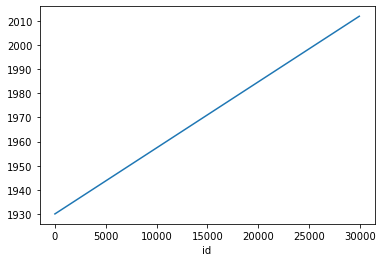

In [24]:
planets["date_g"].plot()

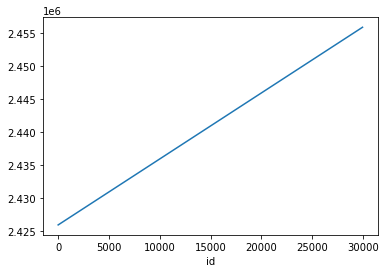

In [25]:
planets["date_y"].plot()

In [26]:
planets['date_y'].min()

2425978.0

In [27]:
planets['date_y'].max()

2455927.0

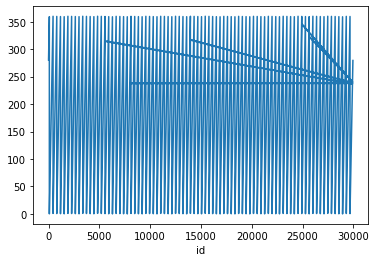

In [28]:
planets['sun'].plot()

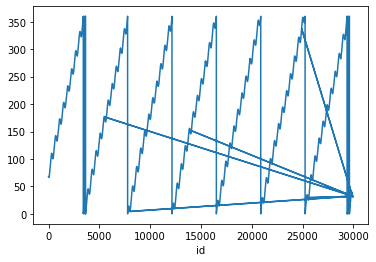

In [29]:
planets['jupiter'].plot()

In [30]:
len(planets)

29950

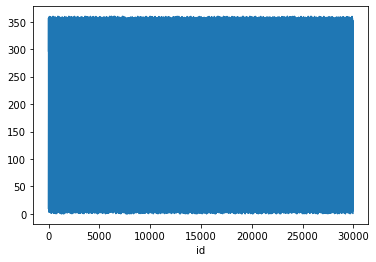

In [44]:
planets['moon'].plot()

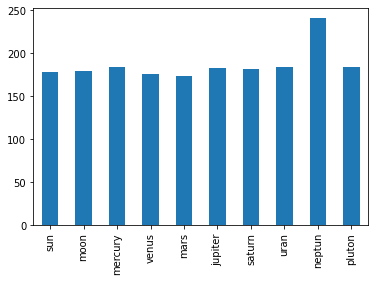

In [52]:
planets.drop(['date_g', 'date_y'], axis=1).mean().plot(kind='bar')

In [64]:
planets['date_g'].min(), planets['date_g'].max()

(Timestamp('1930-01-01 00:00:00'), Timestamp('2011-12-31 00:00:00'))